### The Probability Integral Transform

Let  {$f_t(y_t | \Omega_t)$}$_{t=1}^m$ be a data generating process where $\Omega_t =$ {$y_{t-1}, y_{t -2}, ...$}. <br>
$f_t(y_t|\Omega_t)$ is the density of $y_t$ based on past observations <br>
Let {$p_t(y_t | \Omega_t)$}$_{t=1}^m$ be a sequence of density forecasts of $y_t$ <br>
One can relate the data generated from $f$ and sequence of density forecasts through the probability integral transform, $z_t$: <br>
$$z_t = \int_{-\infty}^{y_t} p_t(u) du = P_t(y_t)$$


Suppose {$y_t$}$_{t=1}^m$ is generated from {$f_t(y_t | \Omega_t)$}$_{t=1}^m$. If a sequence of density forecasts {$p_t(y_t | \Omega_t)$}$_{t=1}^m$ coincides with {$f_t(y_t | \Omega_t)$}$_{t=1}^m$, then the sequence of probability integral transforms of {$y_t$}$_{t=1}^m$ with respect to {$p_t(y_t | \Omega_t)$}$_{t=1}^m$ is iid U(0, 1) (independent and identically distributed coming from a uniform distribution on the interval (0, 1))<br>

Let's start with a simple example. Let's assume we have a time series where the increments are normally distributed, $N$(0, 1)

In [8]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

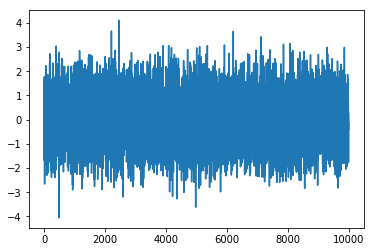

In [17]:
# Generate a realization of a time series with Gaussian increments
m = 10000  # number of points in single realization of a time series
yt = np.random.normal(size=m)  # Gaussian data with mean=0 and sigma=1
plt.plot(yt)
plt.show()

For each point, $y$, in the timeseries, we need to calculate its Probability Integral Transform. This means that, for every value of $y$, we must integrate our assumed probability density from -$\infty$ to $y$. This is the same information we can get from a cumulative density function (CDF). <br>
<br>
Even though we know that we generated the data by pulling from $N(0, 1)$ distribution, let's see what happens if we assume a different distribution. <br>
<br>
Start by checking if this data is well-described by a cauchy distribution.

In [20]:
from scipy.stats import cauchy

zt = cauchy.cdf(yt)  # integrated probability up to each point

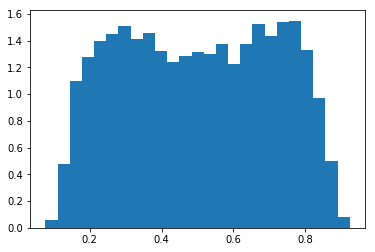

In [21]:
# If cauchy is the correct distribution, then a histogram of the values of zt should be
# uniform

plt.hist(zt, bins=25, density=True)
plt.show()

Nope. Not uniform, cauchy probably isn't the right distribution. We are missing information from the tails. Now try Gaussian.

In [23]:
from scipy.stats import norm

zt = norm.cdf(yt)

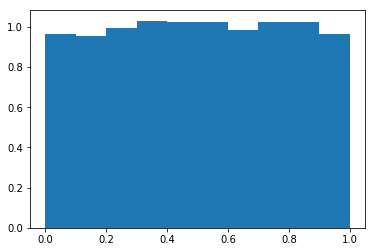

In [24]:
# If we assumed the probability density above (Gaussian) then a histogram of zt values
# should be uniform.
plt.hist(zt, density=True)
plt.show()

That's better. 

Now, let's work through the example of Diebold, Gunther and Tay (see [their paper](https://www.sas.upenn.edu/~fdiebold/papers/paper16/paper16.pdf))

The generalized autoregressive conditional heteroskedasticity (GARCH) process is an approach to esimate the volatility of financial markets. The authors use a GARCH(1,1) data generating process. In a GARCH($p$,$q$) process, the variance, $h_t$ is given by
$$h_t = \omega + \sum_{i=1}^q \alpha_i y_{t-i}^2 + \sum_{i=1}^p \beta_i h_{t-i}$$
So for a GARCH(1, 1) process, we have:
$$h_t = \omega + \alpha y_{t-1}^2 + \beta h_{t-1}$$
<br>
The conditional density of the process is a standardized Student's-t with six degrees of freedom,
$$y_t = \sqrt{\dfrac{2h_t}{3}}t(6)$$

The authors use values of $\omega = 0.01$, $\alpha = 0.13$ and $\beta = 0.86$. <br>

<br>
It has been [suggested](https://stats.stackexchange.com/questions/133286/initial-value-of-the-conditional-variance-in-the-garch-process) that one can initialize the process by setting $h_t$ equal the sample variance.

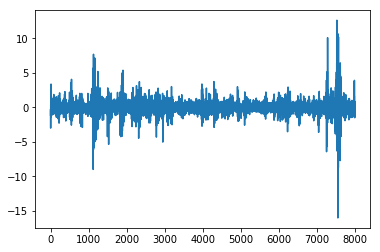

In [47]:
# generate and plot a GARCH(1,1) time series
n = 8000 # number of points in timeseries
ht0 = 1  # initialize h_t-1 with the expected variance

w = 0.01
alpha = 0.13
beta = 0.86

ht = np.zeros([n])
yt = np.zeros([n])

ht[0] = ht0
yt[0] = np.sqrt(2*ht0/3)*np.random.standard_t(6)

for t in range(1, n):
    ht[t] = w + alpha * yt[t - 1]**2 + beta * ht[t - 1]
    yt[t] = np.sqrt(2*ht[t]/3)*np.random.standard_t(6)
    
plt.plot(yt)
plt.show()

1.0168874003564377


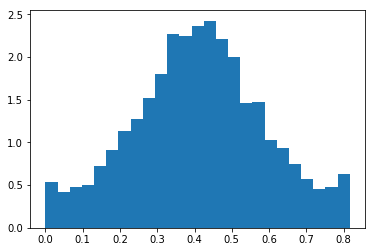

In [52]:
# confirm that we get appropriate distributions 
from scipy.stats import t

zt = np.sqrt(2/3)*t.cdf(yt, 6)

plt.hist(zt, bins=25, density=True)
plt.show()